In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('train_agriculture.xlsx')
df

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...,...
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0


In [3]:
df.drop('ID',axis=1,inplace=True)

In [4]:
df

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1
3,257,1,1,1,0,0.0,0,2,1
4,342,1,0,1,0,0.0,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,NaN,1,1,1
4595,2139,0,1,2,30,47.0,2,1,1
4596,2267,0,1,2,10,7.0,27,2,0
4597,2267,0,1,2,10,20.0,24,2,0


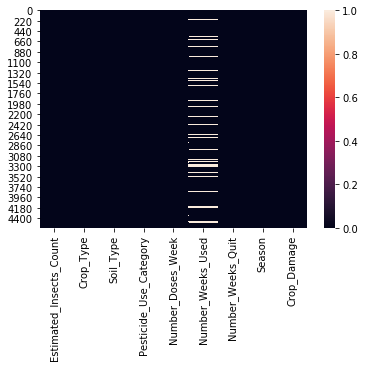

In [5]:
# for checking any null values
sns.heatmap(df.isna())

In [6]:
from sklearn.impute import SimpleImputer

In [7]:
si = SimpleImputer(strategy='mean')
df['Number_Weeks_Used'] = si.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))

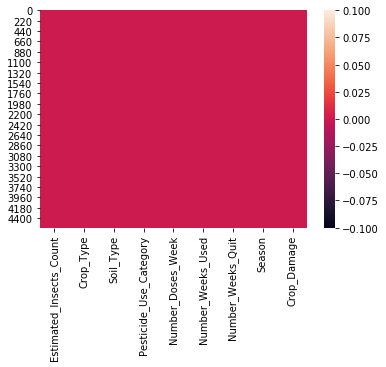

In [8]:
sns.heatmap(df.isna())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  4599 non-null   int64  
 1   Crop_Type                4599 non-null   int64  
 2   Soil_Type                4599 non-null   int64  
 3   Pesticide_Use_Category   4599 non-null   int64  
 4   Number_Doses_Week        4599 non-null   int64  
 5   Number_Weeks_Used        4599 non-null   float64
 6   Number_Weeks_Quit        4599 non-null   int64  
 7   Season                   4599 non-null   int64  
 8   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 323.5 KB


In [10]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [11]:
from scipy.stats import zscore

In [12]:
z=np.abs(zscore(df))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 0.94782668, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 0.94782668, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.83218282, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.52329287, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.80254967, 0.15207762,
        0.42765624]])

In [13]:
threshold=3
np.where(z>3)

(array([   7,    9,   14,   22,   23,  100,  103,  112,  149,  165,  166,
         167,  179,  185,  186,  197,  207,  222,  223,  242,  248,  252,
         264,  265,  290,  296,  305,  316,  325,  346,  351,  355,  361,
         374,  375,  377,  384,  453,  458,  466,  480,  510,  517,  522,
         557,  595,  612,  634,  693,  702,  703,  704,  705,  706,  807,
         819,  855,  856,  911,  944,  978,  980,  998, 1017, 1019, 1067,
        1097, 1178, 1212, 1291, 1307, 1324, 1326, 1327, 1329, 1337, 1339,
        1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1347, 1348, 1349,
        1406, 1443, 1457, 1489, 1523, 1589, 1652, 1654, 1737, 1807, 1868,
        2019, 2043, 2090, 2136, 2139, 2140, 2165, 2170, 2171, 2174, 2183,
        2185, 2188, 2190, 2190, 2191, 2192, 2193, 2194, 2237, 2392, 2553,
        2565, 2585, 2589, 2590, 2590, 2591, 2615, 2663, 2671, 2696, 2702,
        2710, 2714, 2716, 2723, 2767, 2779, 2792, 2796, 2797, 2804, 2806,
        2814, 2828, 2829, 2834, 2841, 

In [14]:
df1 = df[(z<3).all(axis=1)]
df1

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.000000,0,1,0
1,209,1,0,1,0,0.000000,0,2,1
2,257,1,0,1,0,0.000000,0,2,1
3,257,1,1,1,0,0.000000,0,2,1
4,342,1,0,1,0,0.000000,0,2,1
...,...,...,...,...,...,...,...,...,...
4594,2138,0,1,2,20,28.891027,1,1,1
4595,2139,0,1,2,30,47.000000,2,1,1
4596,2267,0,1,2,10,7.000000,27,2,0
4597,2267,0,1,2,10,20.000000,24,2,0


In [15]:
df1.skew()

Estimated_Insects_Count    0.789806
Crop_Type                  1.308548
Soil_Type                  0.079724
Pesticide_Use_Category     0.753578
Number_Doses_Week          0.711083
Number_Weeks_Used          0.275330
Number_Weeks_Quit          0.813382
Season                     0.141605
Crop_Damage                2.003206
dtype: float64

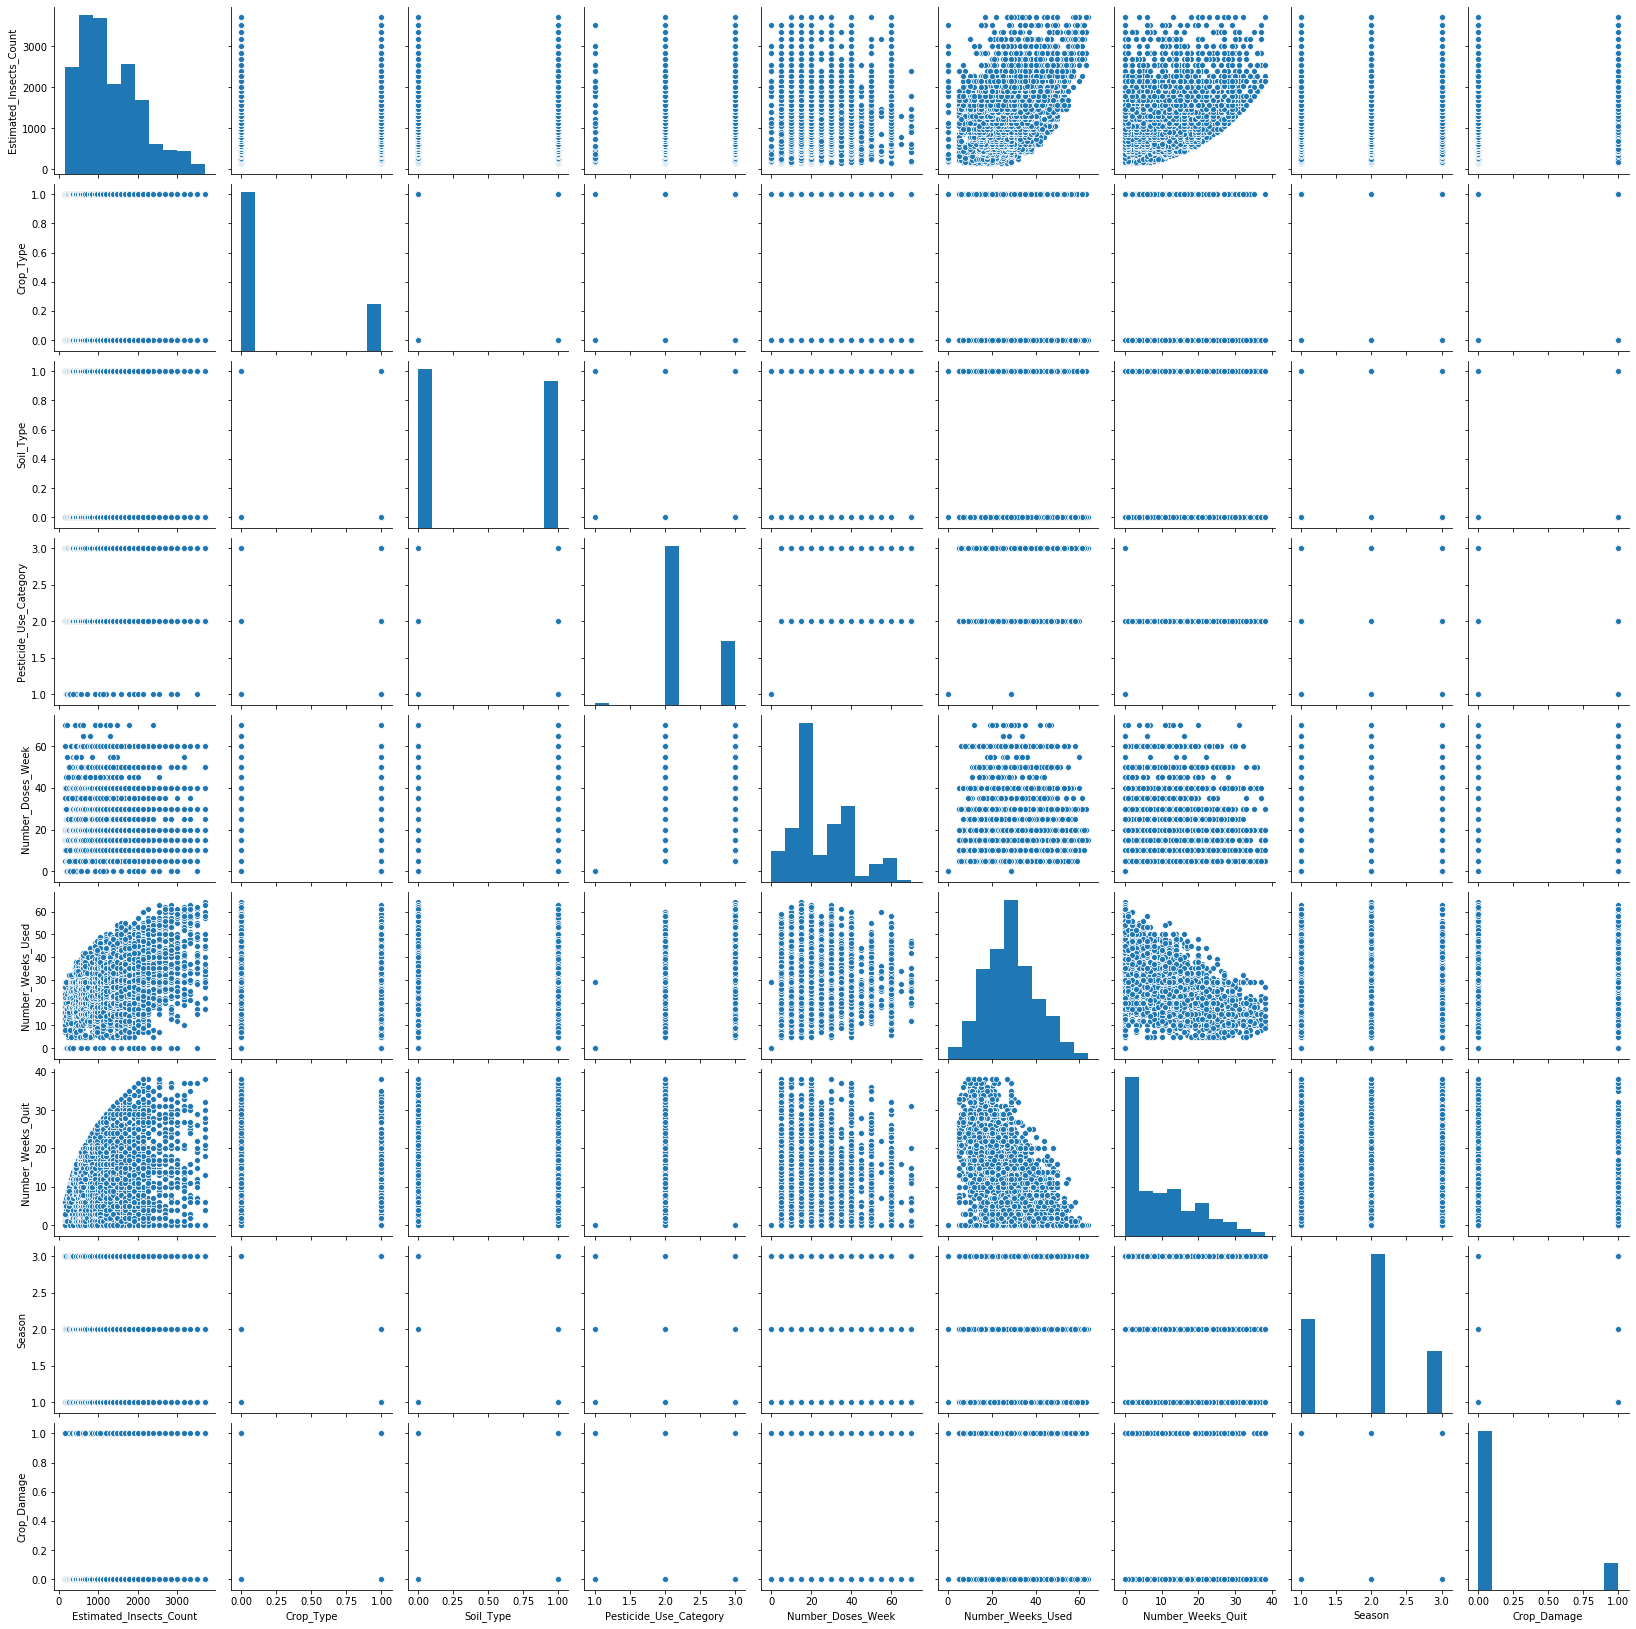

In [16]:
sns.pairplot(df1)

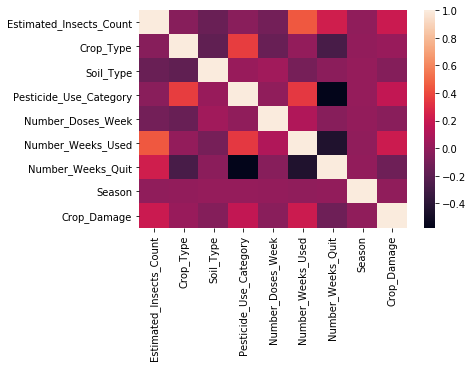

In [17]:
sns.heatmap(df1.corr())

Estimated_Insects_Count       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Crop_Type                  AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Soil_Type                  AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Pesticide_Use_Category        AxesSubplot(0.125,0.391471;0.227941x0.222059)
Number_Doses_Week          AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Number_Weeks_Used          AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Number_Weeks_Quit                AxesSubplot(0.125,0.125;0.227941x0.222059)
Season                        AxesSubplot(0.398529,0.125;0.227941x0.222059)
Crop_Damage                   AxesSubplot(0.672059,0.125;0.227941x0.222059)
dtype: object

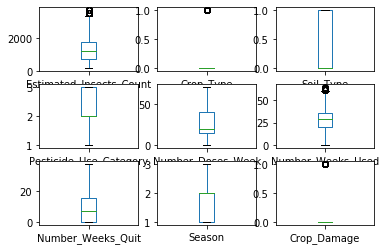

In [18]:
df1.plot(kind='box',subplots=True,layout=(3,3))

In [19]:
X = df1.drop('Crop_Damage',axis=1)
y = df1['Crop_Damage']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [22]:
model=[DecisionTreeClassifier(),GaussianNB(),SVC(),KNeighborsClassifier()]

In [23]:
import warnings
warnings.filterwarnings('ignore')
max_score=0
for r_state in range(42,101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=r_state)
    for m in model:    
        m.fit(X_train,y_train)
        pred = m.predict(X_test)
        a = accuracy_score(y_test,pred)
        print(r_state,a)
        if a>max_score:
            max_score = a
            final_r_state = r_state
print(final_r_state,max_score)

42 0.7789327789327789
42 0.8246708246708246
42 0.8607068607068608
42 0.8316008316008316
43 0.7761607761607762
43 0.8357588357588358
43 0.8503118503118503
43 0.8302148302148302
44 0.7581427581427581
44 0.8239778239778239
44 0.8482328482328483
44 0.8274428274428275
45 0.7858627858627859
45 0.8281358281358281
45 0.8634788634788635
45 0.8440748440748441
46 0.7706167706167706
46 0.8336798336798337
46 0.8537768537768538
46 0.8406098406098406
47 0.7872487872487872
47 0.8232848232848233
47 0.8454608454608454
47 0.8274428274428275
48 0.7920997920997921
48 0.8392238392238393
48 0.8662508662508662
48 0.8392238392238393
49 0.7532917532917532
49 0.8274428274428275
49 0.8551628551628552
49 0.832986832986833
50 0.7754677754677755
50 0.832986832986833
50 0.8586278586278586
50 0.8281358281358281
51 0.7678447678447679
51 0.817047817047817
51 0.8461538461538461
51 0.8184338184338185
52 0.7858627858627859
52 0.8461538461538461
52 0.8565488565488566
52 0.8322938322938322
53 0.7775467775467776
53 0.83229383

In [24]:
# SVC model gives the best result at random state 66
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

In [25]:
for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    predm=m.predict(X_test)
    print('Accuracy Score of',m, 'is: ')
    print(accuracy_score(y_test,predm))

Accuracy Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') is: 
0.7664587664587664
Accuracy Score of GaussianNB(priors=None, var_smoothing=1e-09) is: 
0.8406098406098406
Accuracy Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is: 
0.8683298683298684
Accuracy Score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neigh

In [26]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [27]:
print(accuracy_score(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

0.7636867636867637
[[1045  208]
 [ 133   57]]
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1253
           1       0.22      0.30      0.25       190

    accuracy                           0.76      1443
   macro avg       0.55      0.57      0.56      1443
weighted avg       0.80      0.76      0.78      1443



In [28]:
dtc = DecisionTreeClassifier()
params = {'criterion': ['gini','entropy']}
gscv = GridSearchCV(dtc,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy']},
             pr

In [29]:
gscv.best_params_

{'criterion': 'entropy'}

In [30]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)
dtcpred=dtc.predict(X_test)
dtcpred

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [31]:
print(accuracy_score(y_test,dtcpred))
print(confusion_matrix(y_test,dtcpred))
print(classification_report(y_test,dtcpred))

0.7713097713097713
[[1051  202]
 [ 128   62]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1253
           1       0.23      0.33      0.27       190

    accuracy                           0.77      1443
   macro avg       0.56      0.58      0.57      1443
weighted avg       0.80      0.77      0.79      1443



In [32]:
cvs = cross_val_score(DecisionTreeClassifier(criterion='entropy'),X,y,cv=50)
cvs

array([0.78409091, 0.54545455, 0.53409091, 0.71590909, 0.70454545,
       0.68181818, 0.76136364, 0.93181818, 0.85227273, 0.72727273,
       0.76136364, 0.72727273, 0.61363636, 0.70454545, 0.84090909,
       0.81818182, 0.73863636, 0.76136364, 0.76136364, 0.75      ,
       0.7816092 , 0.59770115, 0.54022989, 0.72413793, 0.83908046,
       0.7816092 , 0.89655172, 0.74712644, 0.77011494, 0.50574713,
       0.29885057, 0.71264368, 0.55172414, 0.63218391, 0.89655172,
       0.75862069, 0.79310345, 0.8045977 , 0.7816092 , 0.68965517,
       0.62068966, 0.45977011, 0.82758621, 0.83908046, 0.82758621,
       0.89655172, 0.82758621, 0.70114943, 0.68965517, 0.65517241])

In [33]:
cvs.mean()

0.7232836990595611

In [34]:
cvs.max()

0.9318181818181818

In [35]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnbpred=gnb.predict(X_test)
print(accuracy_score(y_test,gnbpred))
print(confusion_matrix(y_test,gnbpred))
print(classification_report(y_test,gnbpred))

0.8406098406098406
[[1148  105]
 [ 125   65]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1253
           1       0.38      0.34      0.36       190

    accuracy                           0.84      1443
   macro avg       0.64      0.63      0.64      1443
weighted avg       0.83      0.84      0.84      1443



In [36]:
cvs = cross_val_score(GaussianNB(),X,y,cv=50)
cvs

array([0.84090909, 0.77272727, 0.28409091, 0.86363636, 0.73863636,
       0.38636364, 0.79545455, 0.98863636, 0.98863636, 0.94318182,
       0.85227273, 0.86363636, 0.82954545, 0.86363636, 0.93181818,
       0.85227273, 0.85227273, 0.85227273, 0.875     , 0.93181818,
       0.87356322, 0.86206897, 0.85057471, 0.82758621, 0.86206897,
       0.87356322, 0.86206897, 0.81609195, 0.85057471, 0.82758621,
       0.27586207, 0.86206897, 0.82758621, 0.34482759, 0.91954023,
       1.        , 0.87356322, 0.85057471, 0.85057471, 0.94252874,
       0.90804598, 0.65517241, 0.85057471, 0.85057471, 0.86206897,
       0.88505747, 0.91954023, 0.85057471, 0.85057471, 0.85057471])

In [37]:
cvs.mean()

0.8208490073145245

In [38]:
cvs.max()

1.0

In [39]:
svc=SVC()
svc.fit(X_train,y_train)
svcpred=svc.predict(X_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8683298683298684
[[1253    0]
 [ 190    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1253
           1       0.00      0.00      0.00       190

    accuracy                           0.87      1443
   macro avg       0.43      0.50      0.46      1443
weighted avg       0.75      0.87      0.81      1443



In [40]:
svc = SVC()
params = {'C':[0.0001,0.001,0.01,0.1,1,10],'gamma':[0.1,1,10,100]}
gscv = GridSearchCV(svc,param_grid=params)
gscv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
gscv.best_params_

{'C': 0.0001, 'gamma': 0.1}

In [42]:
svc = SVC(C=0.0001,gamma=0.1)
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8683298683298684
[[1253    0]
 [ 190    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1253
           1       0.00      0.00      0.00       190

    accuracy                           0.87      1443
   macro avg       0.43      0.50      0.46      1443
weighted avg       0.75      0.87      0.81      1443



In [ ]:
svc = SVC(C=0.0001,gamma=0.1,kernel='linear')
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

In [ ]:
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

In [ ]:
svc = SVC(C=0.0001,gamma=0.1,kernel='poly')
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

In [ ]:
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

In [ ]:
svc = SVC(C=0.0001,gamma=0.1,kernel='rbf')
svc.fit(X_train,y_train)
svcpred = svc.predict(X_test)
svcpred

In [43]:
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.8683298683298684
[[1253    0]
 [ 190    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1253
           1       0.00      0.00      0.00       190

    accuracy                           0.87      1443
   macro avg       0.43      0.50      0.46      1443
weighted avg       0.75      0.87      0.81      1443



In [44]:
cvs = cross_val_score(SVC(C=0.0001,gamma=0.1),X,y,cv=50)
cvs

array([0.85227273, 0.85227273, 0.85227273, 0.85227273, 0.85227273,
       0.85227273, 0.85227273, 0.85227273, 0.85227273, 0.85227273,
       0.85227273, 0.85227273, 0.85227273, 0.85227273, 0.85227273,
       0.85227273, 0.85227273, 0.85227273, 0.85227273, 0.85227273,
       0.86206897, 0.86206897, 0.86206897, 0.86206897, 0.86206897,
       0.86206897, 0.86206897, 0.86206897, 0.86206897, 0.86206897,
       0.86206897, 0.85057471, 0.85057471, 0.85057471, 0.85057471,
       0.85057471, 0.85057471, 0.85057471, 0.85057471, 0.85057471,
       0.85057471, 0.85057471, 0.85057471, 0.85057471, 0.85057471,
       0.85057471, 0.85057471, 0.85057471, 0.85057471, 0.85057471])

In [45]:
cvs.mean()

0.8537826541274817

In [46]:
cvs.max()

0.8620689655172413

In [47]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.8357588357588358
[[1183   70]
 [ 167   23]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1253
           1       0.25      0.12      0.16       190

    accuracy                           0.84      1443
   macro avg       0.56      0.53      0.54      1443
weighted avg       0.79      0.84      0.81      1443



In [49]:
knn = KNeighborsClassifier()
params = {'n_neighbors': range(1,50)}
gscv = RandomizedSearchCV(knn,param_distributions=params)
gscv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_neighbors': range(1, 50)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [50]:
gscv.best_params_

{'n_neighbors': 8}

In [59]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
knnpred=knn.predict(X_test)
knnpred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
print(accuracy_score(y_test,knnpred))
print(confusion_matrix(y_test,knnpred))
print(classification_report(y_test,knnpred))

0.8551628551628552
[[1223   30]
 [ 179   11]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1253
           1       0.27      0.06      0.10       190

    accuracy                           0.86      1443
   macro avg       0.57      0.52      0.51      1443
weighted avg       0.79      0.86      0.81      1443



In [61]:
cvs = cross_val_score(KNeighborsClassifier(n_neighbors=8),X,y,cv=50)
cvs

array([0.85227273, 0.80681818, 0.73863636, 0.85227273, 0.84090909,
       0.85227273, 0.79545455, 0.86363636, 0.84090909, 0.86363636,
       0.85227273, 0.85227273, 0.85227273, 0.79545455, 0.85227273,
       0.85227273, 0.82954545, 0.85227273, 0.85227273, 0.875     ,
       0.86206897, 0.85057471, 0.81609195, 0.81609195, 0.86206897,
       0.85057471, 0.85057471, 0.85057471, 0.86206897, 0.82758621,
       0.79310345, 0.85057471, 0.85057471, 0.83908046, 0.85057471,
       0.85057471, 0.86206897, 0.85057471, 0.82758621, 0.85057471,
       0.81609195, 0.71264368, 0.85057471, 0.85057471, 0.82758621,
       0.86206897, 0.85057471, 0.85057471, 0.85057471, 0.85057471])

In [62]:
cvs.mean()

0.839362591431557

In [63]:
cvs.max()

0.875

In [56]:
ad=AdaBoostClassifier(n_estimators=50,base_estimator=SVC(C=0.0001,gamma=0.1),algorithm='SAMME')
ad.fit(X_train,y_train)
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.8683298683298684
[[1253    0]
 [ 190    0]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1253
           1       0.00      0.00      0.00       190

    accuracy                           0.87      1443
   macro avg       0.43      0.50      0.46      1443
weighted avg       0.75      0.87      0.81      1443



In [57]:
rfc = RandomForestClassifier(criterion='entropy')
rfc.fit(X_train,y_train)
rfcpred = rfc.predict(X_test)
rfcpred
print(accuracy_score(y_test,rfcpred))
print(confusion_matrix(y_test,rfcpred))
print(classification_report(y_test,rfcpred))

0.8537768537768538
[[1193   60]
 [ 151   39]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1253
           1       0.39      0.21      0.27       190

    accuracy                           0.85      1443
   macro avg       0.64      0.58      0.59      1443
weighted avg       0.82      0.85      0.83      1443



In [58]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbcpred = gbc.predict(X_test)
gbcpred
print(accuracy_score(y_test,gbcpred))
print(confusion_matrix(y_test,gbcpred))
print(classification_report(y_test,gbcpred))

0.8676368676368676
[[1222   31]
 [ 160   30]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1253
           1       0.49      0.16      0.24       190

    accuracy                           0.87      1443
   macro avg       0.69      0.57      0.58      1443
weighted avg       0.83      0.87      0.84      1443



In [64]:
# of all the methods used we see that SVC delivers the best result with accuracy score of upto 86%

In [65]:
from sklearn.externals import joblib

joblib.dump(svc,'agrisvcfile.obj')
svc_from_joblib=joblib.load('agrisvcfile.obj')
svc_from_joblib.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)